<h1> <center><font color='blue'>Regresión Lineal 1D: Entrenando 2 parámetros</font></center></h1>


<h2>Objetivo</h2><ul><li> Entrenar el modelo y visualizar la pérdida</li></ul> 


<h2>Tabla de contenido</h2>

<ul>
    <li><a href="#Makeup_Data">Crear algunos datos</a></li>
    <li><a href="#Model_Cost">Crear el modelo y la función de costo (Total Loss) </a></li>
    <li><a href="#Train">Entrenar el modelo </a></li>
</ul>

<hr>


<h2>Preparación</h2>


In [16]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

Importamos las librerías 


In [17]:
# These are the libraries we are going to use in the lab.

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

La clase <code>plot_error_surfaces</code> nos ayuda a visualizar el espacio de datos y de parámetros durante el entrenamiento y no tiene nada que ver con PyTorch.


In [18]:
# The class for plot the diagram

class plot_error_surfaces(object):
    
    # Constructor
    def __init__(self, w_range, b_range, X, Y, n_samples = 30, go = True):
        W = np.linspace(-w_range, w_range, n_samples)
        B = np.linspace(-b_range, b_range, n_samples)
        w, b = np.meshgrid(W, B)    
        Z = np.zeros((30,30))
        count1 = 0
        self.y = Y.numpy()
        self.x = X.numpy()
        for w1, b1 in zip(w, b):
            count2 = 0
            for w2, b2 in zip(w1, b1):
                Z[count1, count2] = np.mean((self.y - w2 * self.x + b2) ** 2)
                count2 += 1
            count1 += 1
        self.Z = Z
        self.w = w
        self.b = b
        self.W = []
        self.B = []
        self.LOSS = []
        self.n = 0
        if go == True:
            plt.figure()
            plt.figure(figsize = (7.5, 5))
            plt.axes(projection='3d').plot_surface(self.w, self.b, self.Z, rstride = 1, cstride = 1,cmap = 'viridis', edgecolor = 'none')
            plt.title('Cost/Total Loss Surface')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.show()
            plt.figure()
            plt.title('Cost/Total Loss Surface Contour')
            plt.xlabel('w')
            plt.ylabel('b')
            plt.contour(self.w, self.b, self.Z)
            plt.show()
    
    # Setter
    def set_para_loss(self, W, B, loss):
        self.n = self.n + 1
        self.W.append(W)
        self.B.append(B)
        self.LOSS.append(loss)
    
    # Plot diagram
    def final_plot(self): 
        ax = plt.axes(projection = '3d')
        ax.plot_wireframe(self.w, self.b, self.Z)
        ax.scatter(self.W,self.B, self.LOSS, c = 'r', marker = 'x', s = 200, alpha = 1)
        plt.figure()
        plt.contour(self.w,self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()
    
    # Plot diagram
    def plot_ps(self):
        plt.subplot(121)
        plt.ylim
        plt.plot(self.x, self.y, 'ro', label="training points")
        plt.plot(self.x, self.W[-1] * self.x + self.B[-1], label = "estimated line")
        plt.xlabel('x')
        plt.ylabel('y')
        plt.ylim((-10, 15))
        plt.title('Data Space Iteration: ' + str(self.n))

        plt.subplot(122)
        plt.contour(self.w, self.b, self.Z)
        plt.scatter(self.W, self.B, c = 'r', marker = 'x')
        plt.title('Total Loss Surface Contour Iteration' + str(self.n))
        plt.xlabel('w')
        plt.ylabel('b')
        plt.show()

<!--Empty Space for separating topics-->


<h2 id="Makeup_Data">Creando algunos datos</h2>


In [19]:
# Import PyTorch library

import torch

Comenzamos generando valores en el rango de -3 a 3 para crear una recta con pendiente de 1 y sesgo de -1. Esta es la recta que necesitamos estimar.



In [20]:
# Creamos f(X) con pendiente 1 y sesgo -1

X = torch.arange(-3, 3, 0.1).view(-1, 1)
f = 1 * X - 1

Agregamos ruido a los datos:


In [21]:
# Add noise

Y = f + 0.1 * torch.randn(X.size())

Graficamos f e Y:


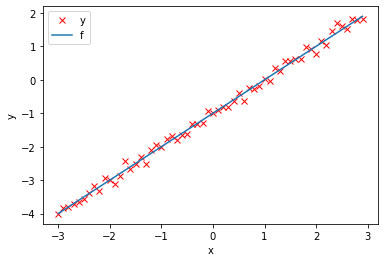

In [22]:
# Graficamos la recta y los puntos con ruido

plt.plot(X.numpy(), Y.numpy(), 'rx', label = 'y')
plt.plot(X.numpy(), f.numpy(), label = 'f')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

<h2 id="Model_Cost">Creamos el modelo y la función de costo (Total Loss)</h2>


Definimos la función <code>forward</code>: 


In [23]:
# Define the forward function

def forward(x):
    return w * x + b

Definimos el costo (MSE): 


In [24]:
# Define the MSE Loss function

def criterion(yhat,y):
    return torch.mean((yhat-y)**2)

Creamos un objeto <code> plot_error_surfaces</code> para visualizar el espacio de datos y de parámetros durante el entrenamiento:


<Figure size 432x288 with 0 Axes>

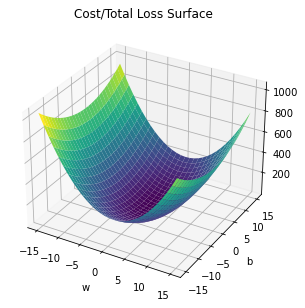

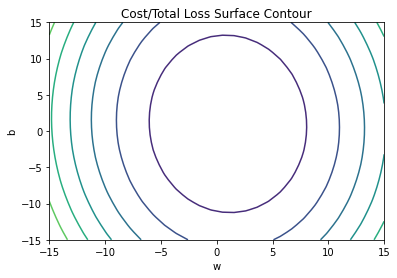

In [25]:
# Create plot_error_surfaces for viewing the data

get_surface = plot_error_surfaces(15, 15, X, Y, 30)

<!--Empty Space for separating topics-->


<h2 id="Train">Entrenando el modelo</h2>


Creamos los parámetros del modelo w y b estableciendo el argumento requires_grad en True ya que debemos aprenderlos usando los datos.


In [26]:
# Define the parameters w, b for y = wx + b

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)

Establecemos la tasa de aprendizaje en 0.1 y creamos una lista vacía LOSS para almacenar la pérdida de cada iteración.


In [27]:
# Define learning rate and create an empty list for containing the loss for each iteration.

lr = 0.1
LOSS = []

Definimos la función <code>train_model</code> para entrenar el modelo.


In [28]:
# The function for training the model

def train_model(iter):
    
    # Loop
    for epoch in range(iter):
        
        # make a prediction
        Yhat = forward(X)
        
        # calculate the loss 
        loss = criterion(Yhat, Y)

        # Section for plotting
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
            
        # store the loss in the list LOSS
        LOSS.append(loss)
        
        # backward pass: compute gradient of the loss with respect to all the learnable parameters
        loss.backward()
        
        # update parameters slope and bias
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        
        # zero the gradients before running the backward pass
        w.grad.data.zero_()
        b.grad.data.zero_()

Ejecutamos 15 iteraciones del gradiente descendente: <b>bug</b> el espacio de datos está 1 iteración adelante del espacio de parámetros.


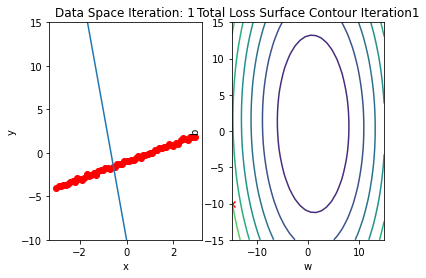

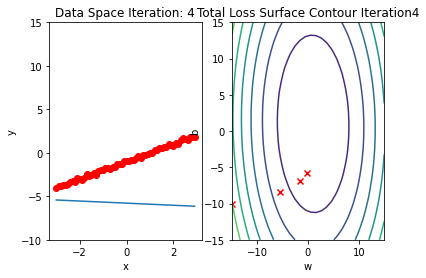

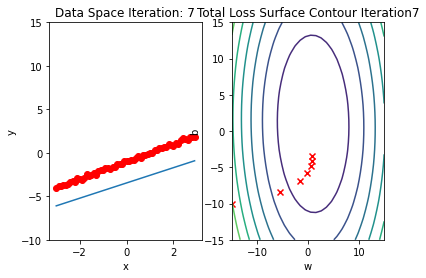

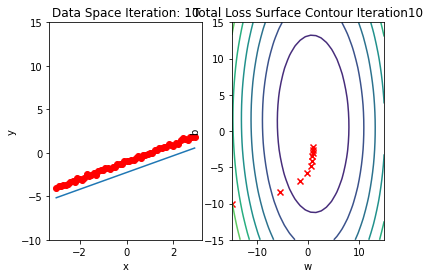

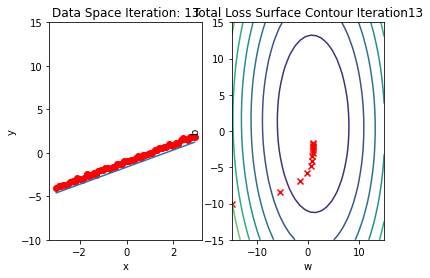

In [29]:
# Train the model with 15 iterations

train_model(15)

Graficamos la superficie de pérdida/costo con valores de pérdida para diferentes parámetros en rojo:


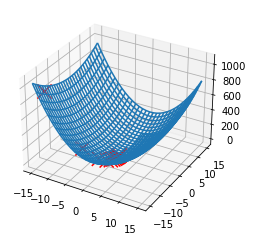

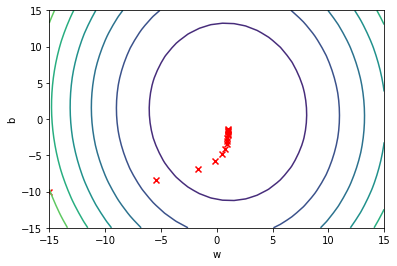

Text(23.875, 0.5, 'Cost')

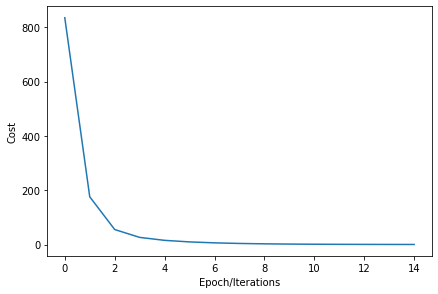

In [30]:
# Plot out the Loss Result

get_surface.final_plot()
plt.plot(LOSS)
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")

<!--Empty Space for separating topics-->


<h3>Práctica</h3>


Experimente usando una tasa de aprendizaje de 0.2.


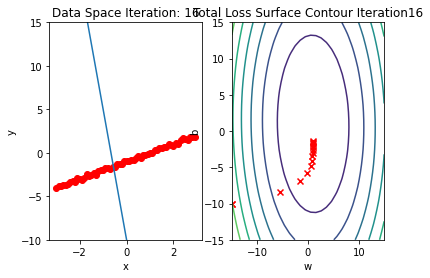

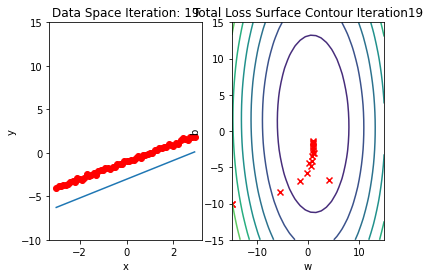

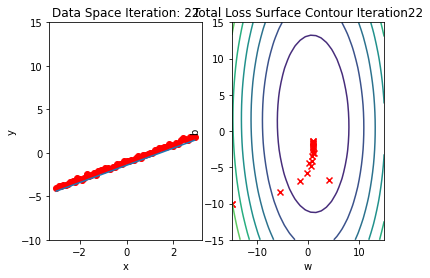

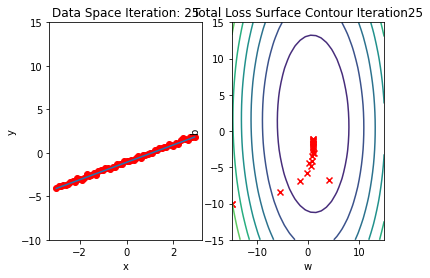

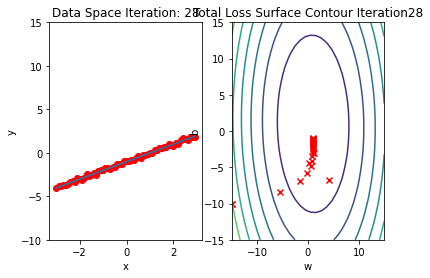

In [32]:
# Practice: train and plot the result with lr = 0.2 and the following parameters

w = torch.tensor(-15.0, requires_grad = True)
b = torch.tensor(-10.0, requires_grad = True)
lr = 0.2
LOSS2 = []
#
def my_train_model(iter):
    for epoch in range(iter):
        Yhat = forward(X)
        loss = criterion(Yhat, Y)
        get_surface.set_para_loss(w.data.tolist(), b.data.tolist(), loss.tolist())
        if epoch % 3 == 0:
            get_surface.plot_ps()
        LOSS2.append(loss)
        loss.backward()
        w.data = w.data - lr * w.grad.data
        b.data = b.data - lr * b.grad.data
        w.grad.data.zero_()
        b.grad.data.zero_()
my_train_model(15)

Grafique <code>LOSS</code> y <code>LOSS2</code>


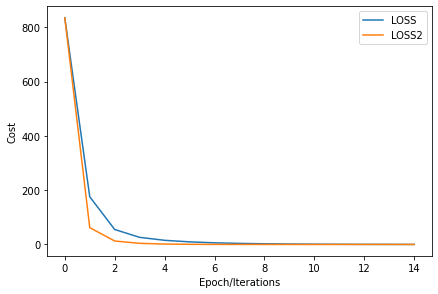

In [33]:
# Practice: Plot the LOSS and LOSS2 in order to compare the Total Loss
plt.plot(LOSS, label = "LOSS")
plt.plot(LOSS2, label = "LOSS2")
plt.tight_layout()
plt.xlabel("Epoch/Iterations")
plt.ylabel("Cost")
plt.legend()